In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from libpysal import weights
import networkx as nx

import os
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\laszlovreedenb\OneDrive - Delft University of Technology\Documents\code\flee\data_assimilation\test


In [2]:
# Load the shapefile
# shapefile_path = '../../disaster_sources/mozambique/moz_adm_shp/moz_admbnda_adm3_ine_20190607.shp'
# gdf = gpd.read_file(shapefile_path)
# zambezia_gdf = gdf[gdf['ADM1_PCODE'] == 'MZ11'].reset_index(drop=True)
# zambezia_gdf[:10]

shapefile_path = '../../data_assimilation/test/disaster_sources/mozambique/moz_admbnda_adm3_ine__km2/moz_admbnda_adm3_ine_20190910_km2.shp'
gdf = gpd.read_file(shapefile_path)
zambezia_gdf = gdf[gdf['admin1Pcod'] == 'MZ11'].reset_index(drop=True)

# For testing, use only small selection of locations
selected_regions =['Gonhane', 
                'Inhassunge',
                'Cidade De Quelimane', 
                'Maquival',
                'Macuze',
                'Nicoadala',
                'Namacurra',
                'Nante',
                'Maganja',
                'Bajone',
                'Mocuba',
                'Derre', 
                'Campo', 
                'Pebane', 
                'Mocubela', 
                'Micaune']
zambezia_gdf = zambezia_gdf[zambezia_gdf['admin3Name'].isin(selected_regions)].reset_index(drop=True)
zambezia_gdf[:10]


c:\Users\laszlovreedenb\micromamba\envs\env_flee\Lib\site-packages\pyogrio\core.py:35: RuntimeWarning: Could not detect GDAL data files. Set GDAL_DATA environment variable to the correct path.
  _init_gdal_data()


OBJECTID           admin3Name admin3Pcod admin3RefN admin3AltN admin3Al_1  \
0        11               Bajone   MZ111501       None       None       None   
1        24                Campo   MZ111701       None       None       None   
2        80  Cidade De Quelimane   MZ110301       None       None       None   
3        91                Derre   MZ110401       None       None       None   
4       109              Gonhane   MZ110801       None       None       None   
5       132           Inhassunge   MZ110802       None       None       None   
6       174               Macuze   MZ112001       None       None       None   
7       177              Maganja   MZ111101       None       None       None   
8       200             Maquival   MZ111201       None       None       None   
9       246              Micaune   MZ110202       None       None       None   

            admin2Name admin2Pcod admin1Name admin1Pcod  admin0Name  \
0             Mocubela     MZ1115   Zambezia       MZ11  Mozambique   
1               Mopeia     MZ1117   Zambezia       MZ11  Mozambique   
2  Cidade De Quelimane     MZ1103   Zambezia       MZ11  Mozambique   
3                Derre     MZ1104   Zambezia       MZ11  Mozambique   
4           Inhassunge     MZ1108   Zambezia       MZ11  Mozambique   
5           Inhassunge     MZ1108   Zambezia       MZ11  Mozambique   
6            Namacurra     MZ1120   Zambezia       MZ11  Mozambique   
7     Maganja Da Costa     MZ1111   Zambezia       MZ11  Mozambique   
8             Maquival     MZ1112   Zambezia       MZ11  Mozambique   
9               Chinde     MZ1102   Zambezia       MZ11  Mozambique   

   admin0Na_1 admin0Pcod       date    validOn validTo  Shape_Leng  \
0  Moçambique         MZ 2019-04-02 2019-06-07     NaT    2.336629   
1  Moçambique         MZ 2019-04-02 2019-06-07     NaT    3.306913   
2  Moçambique         MZ 2019-04-02 2019-06-07     NaT    0.586949   
3  Moçambique         MZ 2019-04-02 2019-06-07     NaT    3.333202   
4  Moçambique         MZ 2019-04-02 2019-06-07     NaT    0.947010   
5  Moçambique         MZ 2019-04-02 2019-06-07     NaT    1.865178   
6  Moçambique         MZ 2019-04-02 2019-06-07     NaT    1.658672   
7  Moçambique         MZ 2019-04-02 2019-06-07     NaT    2.406319   
8  Moçambique         MZ 2019-04-02 2019-06-07     NaT    1.501130   
9  Moçambique         MZ 2019-04-02 2019-06-07     NaT    2.611450   

   Shape_Area          km2                                           geometry  
0    0.114528  1348.087145  POLYGON ((1336544.17 -2005771.063, 1342400.622...  
1    0.312639  3668.170692  POLYGON ((1132864.829 -2058199.197, 1138132.39...  
2    0.010371   121.662196  POLYGON ((1217645.119 -2103120.341, 1217617.14...  
3    0.402970  4746.788748  POLYGON ((1131116.84 -1957800.099, 1131198.356...  
4    0.021268   249.111677  MULTIPOLYGON (((1212882.342 -2138440.375, 1212...  
5    0.043114   505.308278  MULTIPOLYGON (((1224190.027 -2112818.049, 1224...  
6    0.054901   644.967989  POLYGON ((1254214.593 -2044763.135, 1254229.75...  
7    0.131577  1548.006397  POLYGON ((1301015.4 -2003570.557, 1301025.201 ...  
8    0.052616   617.401131  POLYGON ((1233368.127 -2073671.745, 1233380.42...  
9    0.178800  2092.386261  MULTIPOLYGON (((1212532.562 -2140729.389, 1212...

C:\Users\laszlovreedenb\AppData\Local\Temp\ipykernel_4380\2825546611.py:9: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  queen = weights.Queen.from_dataframe(zambezia_gdf)


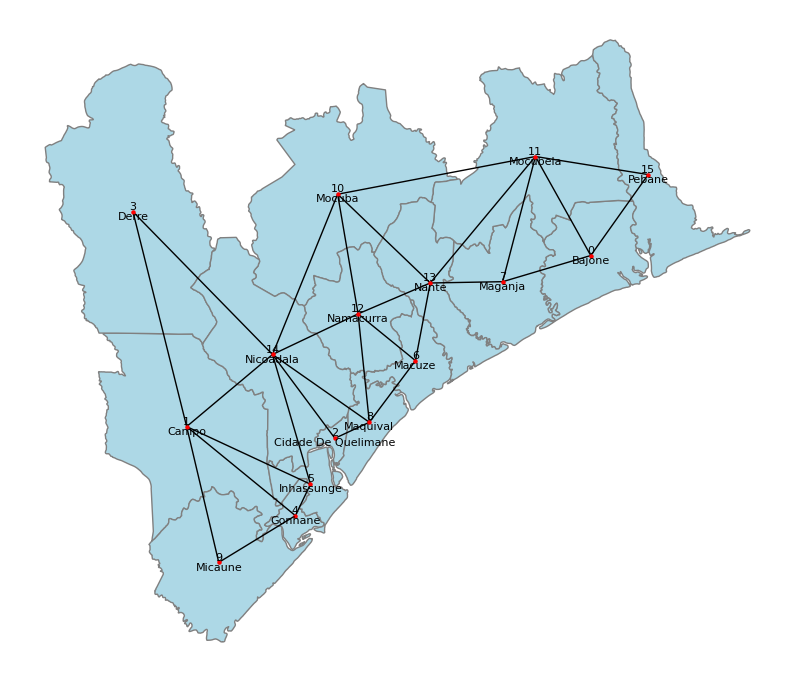

In [3]:
# extract the centroids for connecting the regions, which is
# the average of the coordinates that define the polygon's boundary
# Note: When actually using this, the centroid will not be the place where moest people live and move from.
centroids = np.column_stack((zambezia_gdf.centroid.x, zambezia_gdf.centroid.y))

# construct the "Queen" adjacency graph. In geographical applications,
# the "Queen" adjacency graph considers two polygons as connected if
# they share a single point on their boundary. 
queen = weights.Queen.from_dataframe(zambezia_gdf)
# print(queen)

# Then, we can convert the graph to networkx object using the
# .to_networkx() method.
graph = queen.to_networkx()
# print(graph)

# # To plot with networkx, we need to merge the nodes back to
# # their positions in order to plot in networkx
positions = dict(zip(graph.nodes, centroids))
# print(positions)

# Add edge lengths as attributes (distance between centroids)
for u, v in graph.edges():
    x1, y1 = positions[u]
    x2, y2 = positions[v]
    length = np.sqrt((x1 - x2)**2 + (y1 - y2)**2) / 1000  # Convert to kilometers
    graph[u][v]['length'] = length


# # plot with a nice basemap
fig, ax = plt.subplots(figsize=(10, 10))
zambezia_gdf.plot(linewidth=1, edgecolor="grey", facecolor="lightblue", ax=ax)
# Add labels at centroids
for idx, row in zambezia_gdf.iterrows():
    centroid = row.geometry.centroid
    ax.text(centroid.x, centroid.y, zambezia_gdf.iloc[idx]['admin3Name'], fontsize=8, ha='center', va='top', color='black')


nx.draw(graph, positions, ax=ax, node_size=5, node_color="r")
nx.draw_networkx_labels(graph, positions, ax=ax, font_size=8, verticalalignment='bottom')
plt.show()

In [4]:
# Reproject to lon/lat and get centroids
zambezia_gdf_lonlat = zambezia_gdf.to_crs(epsg=4326)
centroids_lonlat = np.column_stack((zambezia_gdf_lonlat.centroid.x, zambezia_gdf_lonlat.centroid.y))

# Add as new columns
zambezia_gdf['centroid_lon'] = centroids_lonlat[:, 0]
zambezia_gdf['centroid_lat'] = centroids_lonlat[:, 1]
zambezia_gdf[:10]

C:\Users\laszlovreedenb\AppData\Local\Temp\ipykernel_4380\1117705881.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids_lonlat = np.column_stack((zambezia_gdf_lonlat.centroid.x, zambezia_gdf_lonlat.centroid.y))


OBJECTID           admin3Name admin3Pcod admin3RefN admin3AltN admin3Al_1  \
0        11               Bajone   MZ111501       None       None       None   
1        24                Campo   MZ111701       None       None       None   
2        80  Cidade De Quelimane   MZ110301       None       None       None   
3        91                Derre   MZ110401       None       None       None   
4       109              Gonhane   MZ110801       None       None       None   
5       132           Inhassunge   MZ110802       None       None       None   
6       174               Macuze   MZ112001       None       None       None   
7       177              Maganja   MZ111101       None       None       None   
8       200             Maquival   MZ111201       None       None       None   
9       246              Micaune   MZ110202       None       None       None   

            admin2Name admin2Pcod admin1Name admin1Pcod  ... admin0Pcod  \
0             Mocubela     MZ1115   Zambezia       MZ11  ...         MZ   
1               Mopeia     MZ1117   Zambezia       MZ11  ...         MZ   
2  Cidade De Quelimane     MZ1103   Zambezia       MZ11  ...         MZ   
3                Derre     MZ1104   Zambezia       MZ11  ...         MZ   
4           Inhassunge     MZ1108   Zambezia       MZ11  ...         MZ   
5           Inhassunge     MZ1108   Zambezia       MZ11  ...         MZ   
6            Namacurra     MZ1120   Zambezia       MZ11  ...         MZ   
7     Maganja Da Costa     MZ1111   Zambezia       MZ11  ...         MZ   
8             Maquival     MZ1112   Zambezia       MZ11  ...         MZ   
9               Chinde     MZ1102   Zambezia       MZ11  ...         MZ   

        date    validOn validTo Shape_Leng Shape_Area          km2  \
0 2019-04-02 2019-06-07     NaT   2.336629   0.114528  1348.087145   
1 2019-04-02 2019-06-07     NaT   3.306913   0.312639  3668.170692   
2 2019-04-02 2019-06-07     NaT   0.586949   0.010371   121.662196   
3 2019-04-02 2019-06-07     NaT   3.333202   0.402970  4746.788748   
4 2019-04-02 2019-06-07     NaT   0.947010   0.021268   249.111677   
5 2019-04-02 2019-06-07     NaT   1.865178   0.043114   505.308278   
6 2019-04-02 2019-06-07     NaT   1.658672   0.054901   644.967989   
7 2019-04-02 2019-06-07     NaT   2.406319   0.131577  1548.006397   
8 2019-04-02 2019-06-07     NaT   1.501130   0.052616   617.401131   
9 2019-04-02 2019-06-07     NaT   2.611450   0.178800  2092.386261   

                                            geometry  centroid_lon  \
0  POLYGON ((1336544.17 -2005771.063, 1342400.622...     37.895245   
1  POLYGON ((1132864.829 -2058199.197, 1138132.39...     36.344782   
2  POLYGON ((1217645.119 -2103120.341, 1217617.14...     36.915137   
3  POLYGON ((1131116.84 -1957800.099, 1131198.356...     36.134364   
4  MULTIPOLYGON (((1212882.342 -2138440.375, 1212...     36.764763   
5  MULTIPOLYGON (((1224190.027 -2112818.049, 1224...     36.822005   
6  POLYGON ((1254214.593 -2044763.135, 1254229.75...     37.223440   
7  POLYGON ((1301015.4 -2003570.557, 1301025.201 ...     37.557150   
8  POLYGON ((1233368.127 -2073671.745, 1233380.42...     37.047218   
9  MULTIPOLYGON (((1212532.562 -2140729.389, 1212...     36.470759   

  centroid_lat  
0   -17.225211  
1   -17.823950  
2   -17.861756  
3   -17.082770  
4   -18.130413  
5   -18.021217  
6   -17.591619  
7   -17.317218  
8   -17.805636  
9   -18.294065  

[10 rows x 22 columns]

In [5]:
pop_df_all = pd.read_excel('../../data_assimilation/test/disaster_sources/mozambique/Mozambique_pop_us_census.xlsx')
pop_df = pop_df_all[pop_df_all['CODE'].str.startswith('MZ004')]
pop_df = pop_df[pop_df['ADM_LEVEL']==3]
pop_df = pop_df[pop_df['YR']==2023].reset_index(drop=True)
pop_df

CODE           BASENAME  ADM_LEVEL    YR GENC FIPS  SEXRATIO  \
0   MZ004001001          Quelimane          3  2023   MZ   MZ      0.99   
1   MZ004001002           Maquival          3  2023   MZ   MZ      0.95   
2   MZ004002001  Alto Molócuè Sede          3  2023   MZ   MZ      0.98   
3   MZ004002002             Nauela          3  2023   MZ   MZ      0.96   
4   MZ004003001        Chinde Sede          3  2023   MZ   MZ      0.98   
5   MZ004003002            Micaune          3  2023   MZ   MZ      0.98   
6   MZ004004001               Gilé          3  2023   MZ   MZ      1.00   
7   MZ004004002       Alto Ligonha          3  2023   MZ   MZ      1.02   
8   MZ004005001    Cidade de Guruè          3  2023   MZ   MZ      1.00   
9   MZ004005002              Lioma          3  2023   MZ   MZ      0.99   
10  MZ004005003          Mepuagiua          3  2023   MZ   MZ      0.96   
11  MZ004006001                Ile          3  2023   MZ   MZ      0.89   
12  MZ004006002             Socone          3  2023   MZ   MZ      0.88   
13  MZ004007001            Mucupia          3  2023   MZ   MZ      0.93   
14  MZ004007002            Gonhane          3  2023   MZ   MZ      0.93   
15  MZ004008001        Lugela Sede          3  2023   MZ   MZ      0.91   
16  MZ004008002            Tacuane          3  2023   MZ   MZ      0.99   
17  MZ004008003          Munhamade          3  2023   MZ   MZ      0.90   
18  MZ004008004          Muabanama          3  2023   MZ   MZ      1.00   
19  MZ004009001   Maganja da Costa          3  2023   MZ   MZ      0.90   
20  MZ004009002              Nante          3  2023   MZ   MZ      0.83   
21  MZ004010001       Milange Sede          3  2023   MZ   MZ      0.99   
22  MZ004010002             Majaua          3  2023   MZ   MZ      0.97   
23  MZ004010003             Mongue          3  2023   MZ   MZ      0.98   
24  MZ004011001   Cidade de Mocuba          3  2023   MZ   MZ      0.98   
25  MZ004011002             Mugeba          3  2023   MZ   MZ      0.96   
26  MZ004011003        Namanjavira          3  2023   MZ   MZ      0.98   
27  MZ004012001        Mopeia Sede          3  2023   MZ   MZ      0.99   
28  MZ004012002              Campo          3  2023   MZ   MZ      0.98   
29  MZ004013001    Morrumbala Sede          3  2023   MZ   MZ      0.97   
30  MZ004013002              Chire          3  2023   MZ   MZ      0.98   
31  MZ004013003             Megaza          3  2023   MZ   MZ      0.95   
32  MZ004014001     Namacurra Sede          3  2023   MZ   MZ      0.91   
33  MZ004014002             Macuse          3  2023   MZ   MZ      0.86   
34  MZ004014003              Malei          3  2023   MZ   MZ      0.93   
35  MZ004015001           Namarroi          3  2023   MZ   MZ      0.86   
36  MZ004015002             Regone          3  2023   MZ   MZ      0.96   
37  MZ004016001     Nicoadala Sede          3  2023   MZ   MZ      0.99   
38  MZ004016002           Munhonha          3  2023   MZ   MZ      0.99   
39  MZ004016003           Namacata          3  2023   MZ   MZ      0.93   
40  MZ004017001        Pebane Sede          3  2023   MZ   MZ      0.98   
41  MZ004017002             Mulela          3  2023   MZ   MZ      1.01   
42  MZ004017003             Naburi          3  2023   MZ   MZ      1.01   
43  MZ004018001           Machindo          3  2023   MZ   MZ      1.00   
44  MZ004018002           Guerissa          3  2023   MZ   MZ      0.97   
45  MZ004019001      Samora Machel          3  2023   MZ   MZ      0.98   
46  MZ004019002          Chimbadzo          3  2023   MZ   MZ      0.96   
47  MZ004020001           Mocubela          3  2023   MZ   MZ      0.99   
48  MZ004020002             Bajone          3  2023   MZ   MZ      0.93   
49  MZ004021001       Molumbo Sede          3  2023   MZ   MZ      1.01   
50  MZ004021002          Corromana          3  2023   MZ   MZ      1.00   
51  MZ004022001           M Bauane          3  2023   MZ   MZ      0.93   
52  MZ004022002            Chiraco  

In [6]:
# Create dictionary to use the UN name for the regions
name_pop_dict = {'Alto Molócuè Sede':'Alto Molocue',
                 'Chinde Sede':'Chinde',
                 'Gilé':'Gile',
                 'Cidade de Guruè':'Gurue',
                 'Cidade de Mocuba':'Mocuba',
                 'Lugela Sede': 'Lugela',
                 'Mucupia':'Inhassunge',
                 'Macuse':'Macuze',
                 'Maganja da Costa':'Maganja',
                 'Milange Sede':'Milange',
                 'Mopeia Sede': 'Mopeia',
                 'Morrumbala Sede': 'Morrumbala',
                 'Namacurra Sede': 'Namacurra',
                 'Pebane Sede': 'Pebane',
                 'Quelimane':'Cidade De Quelimane',
                 'Mulela':'Mualama',
                 }


pop_df['BASENAME']= pop_df['BASENAME'].replace(name_pop_dict)

# Derre is not split in the UN data, but is in the Census data, drop Machindo and Guerissa
# Luabo is not split in the UN data, but is in the Census data, drop Samora Machel and Chimbadzo 
# Mulevala is not in the UN data, but is in the Census data, drop M Bauane and Chiraco
pop_df_adm2 = pop_df_all[pop_df_all['BASENAME'].isin(['Derre', 'Luabo', 'Mulevala', 'Molumbo', 'Nicoadala'])]
pop_df_adm2 = pop_df_adm2[pop_df_adm2['YR']==2023].reset_index(drop=True)

# Drop specific BASENAME values from pop_df
to_drop = ['Machindo', 
           'Guerissa', 
           'Samora Machel', 
           'Chimbadzo', 
           'M Bauane', 
           'Chiraco', 
           'Molumbo Sede', 
           'Corromana',
           'Nicoadala Sede',
           'Munhonha', 
           'Namacata']
pop_df = pop_df[~pop_df['BASENAME'].isin(to_drop)].reset_index(drop=True)
pop_df = pd.concat([pop_df, pop_df_adm2], ignore_index=True)

In [7]:
# Add Malei to Namacurra, as it is not in the UN data
# Get weighted averages for Namacurra
# and sum the population columns
ratio_cols = ['SEXRATIO', 'DEPND', 'DEPND0_14', 'DEPND65_',]  
pop_cols = ['POP', 'POP0_4', 'POP5_9', 'POP10_14',
       'POP15_19', 'POP20_24', 'POP25_29', 'POP30_34', 'POP35_39', 'POP40_44',
       'POP45_49', 'POP50_54', 'POP55_59', 'POP60_64', 'POP65_69', 'POP70_74',
       'POP75_79', 'POP80_84', 'POP85_89', 'POP90_94', 'POP95_99', 'POP100_',
       'MPOP', 'MPOP0_4', 'MPOP5_9', 'MPOP10_14', 'MPOP15_19', 'MPOP20_24',
       'MPOP25_29', 'MPOP30_34', 'MPOP35_39', 'MPOP40_44', 'MPOP45_49',
       'MPOP50_54', 'MPOP55_59', 'MPOP60_64', 'MPOP65_69', 'MPOP70_74',
       'MPOP75_79', 'MPOP80_84', 'MPOP85_89', 'MPOP90_94', 'MPOP95_99',
       'MPOP100_', 'FPOP', 'FPOP0_4', 'FPOP5_9', 'FPOP10_14', 'FPOP15_19',
       'FPOP20_24', 'FPOP25_29', 'FPOP30_34', 'FPOP35_39', 'FPOP40_44',
       'FPOP45_49', 'FPOP50_54', 'FPOP55_59', 'FPOP60_64', 'FPOP65_69',
       'FPOP70_74', 'FPOP75_79', 'FPOP80_84', 'FPOP85_89', 'FPOP90_94',
       'FPOP95_99', 'FPOP100_']
pop_df = pop_df.copy()
pop_df_namacurra = pop_df[pop_df['BASENAME'].isin(['Namacurra','Malei'])]

# Calculate population-weighted averages for ratio columns
weights = pop_df_namacurra['POP']
weighted_avg_ratios = {}

for col in ratio_cols:
    weighted_avg_ratios[col] = np.average(pop_df_namacurra[col], weights=weights)

sum_pops = pop_df_namacurra[pop_cols].sum()

# Create a new row as a dictionary
new_row = {}
for col in ratio_cols:
    new_row[col] = weighted_avg_ratios[col]
for col in pop_cols:
    new_row[col] = sum_pops[col]

for col in ratio_cols + pop_cols:
    pop_df.loc[pop_df['BASENAME'] == 'Namacurra', col] = new_row[col]

# Round SEXRATIO to 2 decimals
pop_df['SEXRATIO'] = pop_df['SEXRATIO'].round(2)

# Round DEPND columns to 1 decimal
pop_df['DEPND'] = pop_df['DEPND'].round(1)
pop_df['DEPND0_14'] = pop_df['DEPND0_14'].round(1)
pop_df['DEPND65_'] = pop_df['DEPND65_'].round(1)


pop_df = pop_df[pop_df['BASENAME'] != 'Malei'].reset_index(drop=True)

In [8]:
# Get sets of names
gdf_names = set(zambezia_gdf['admin3Name'])
pop_names = set(pop_df['BASENAME'])

# Find matches and remainders
matches = gdf_names & pop_names
gdf_only = gdf_names - pop_names
pop_only = pop_names - gdf_names

# Convert to sorted lists for easier viewing
matches = sorted(matches)
gdf_only = sorted(gdf_only)
pop_only = sorted(pop_only)

print("Matches:", matches)
print("In zambezia_gdf only:", gdf_only)
print("In pop_df only:", pop_only)

Matches: ['Bajone', 'Campo', 'Cidade De Quelimane', 'Derre', 'Gonhane', 'Inhassunge', 'Macuze', 'Maganja', 'Maquival', 'Micaune', 'Mocuba', 'Mocubela', 'Namacurra', 'Nante', 'Nicoadala', 'Pebane']
In zambezia_gdf only: []
In pop_df only: ['Alto Ligonha', 'Alto Molocue', 'Chinde', 'Chire', 'Gile', 'Gurue', 'Ile', 'Lioma', 'Luabo', 'Lugela', 'Majaua', 'Megaza', 'Mepuagiua', 'Milange', 'Molumbo', 'Mongue', 'Mopeia', 'Morrumbala', 'Muabanama', 'Mualama', 'Mugeba', 'Mulevala', 'Munhamade', 'Naburi', 'Namanjavira', 'Namarroi', 'Nauela', 'Regone', 'Socone', 'Tacuane']


# Locations csv

In [9]:
col_names = ['admin3Name', 'admin2Name', 'admin1Name', 'centroid_lat', 'centroid_lon',]
locations_gdf = zambezia_gdf[col_names]
locations_gdf['location_type'] = 'flood_zone'
locations_gdf['conflict_date'] = 0

# flood_regions =['Gonhane', 
#                 'Inhassunge',
#                 'Cidade De Quelimane', 
#                 'Maquival',
#                 'Macuze',
#                 'Nicoadala',
#                 'Namacurra',
#                 'Nante',
#                 'Maganja',
#                 'Bajone',
#                 'Mocuba']

# locations_gdf.loc[locations_gdf['admin3Name'].isin(flood_regions), 'location_type'] = 'flood_zone'

# refugee_regions = ['Derre', 
#                    'Campo', 
#                    'Pebane', 
#                    'Mocubela', 
#                    'Micaune']
# locations_gdf.loc[locations_gdf['admin3Name'].isin(refugee_regions), 'location_type'] = 'camp'

locations_gdf = locations_gdf.merge(
    pop_df[['BASENAME', 'POP']],
    left_on='admin3Name',
    right_on='BASENAME',
    how='left'
)
locations_gdf = locations_gdf.drop(columns=['BASENAME'])  # Optional: remove BASENAME column after merge
locations_gdf = locations_gdf.rename(columns={
    'admin3Name': '#name',
    'admin2Name': 'region',
    'admin1Name': 'country',
    'POP': 'population',
    'centroid_lat': 'lat',
    'centroid_lon': 'lon'
})

locations_gdf['population'] = round(locations_gdf['population'] / 1000).astype(int) # Divide by 1000 for runtime
locations_gdf.to_csv('../../data_assimilation/test/disaster_input/mozambique/locations.csv', index=False)
locations_gdf['population']

C:\Users\laszlovreedenb\AppData\Local\Temp\ipykernel_4380\3510481220.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations_gdf['location_type'] = 'flood_zone'
C:\Users\laszlovreedenb\AppData\Local\Temp\ipykernel_4380\3510481220.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations_gdf['conflict_date'] = 0


0      92
1      70
2     288
3     141
4      22
5      68
6      93
7      86
8      97
9      34
10    251
11     41
12    145
13     47
14    243
15     84
Name: population, dtype: int64

# Routes csv

In [ ]:
# Create routes input
# Create a mapping from node index to admin3Name
index_to_name = zambezia_gdf['admin3Name'].to_dict()

# Build the list of edges with names and lengths
edges_with_names = []
for u, v, data in graph.edges(data=True):
    name_u = index_to_name[u]
    name_v = index_to_name[v]
    length = round(data['length']) / 1000  # Convert to kilometers
    edges_with_names.append((name_u, name_v, length))

# Create a DataFrame from edges_with_names
routes_df = pd.DataFrame(edges_with_names, columns=['#name1', 'name2', 'distance'])
routes_df['forced_redirection'] = 0
routes_df.to_csv('../../data_assimilation/test/disaster_input/mozambique/routes.csv', index=False)
routes_df.head()

#name1     name2  distance  forced_redirection
0  Bajone   Maganja        36                   0
1  Bajone  Mocubela        45                   0
2  Bajone    Pebane        39                   0
3   Campo     Derre        88                   0
4   Campo   Gonhane        56                   0

# Flood level

In [28]:
# Create an empty DataFrame with #name values from locations_gdf as column names
flood_level_df = pd.DataFrame(columns=['#Day'] + list(locations_gdf['#name'].values))
flood_level_df['#Day'] = flood_level_df['#Day'] = list(range(0, 31))
# Fill columns 'Nante', 'Maganja', 'Bajone', 'Macuba' with 1 from index 10 onwards
low_intensity = ['Nante', 'Maganja', 'Bajone', 'Mocuba']
flood_level_df.loc[10:25, low_intensity] = 1

high_intensity = ['Gonhane', 'Inhassunge', 'Cidade De Quelimane', 'Maquival', 'Macuze', 'Nicoadala', 'Namacurra']
flood_level_df.loc[10:15, high_intensity] = 1
flood_level_df.loc[15:20, high_intensity] = 2
flood_level_df.loc[20:25, high_intensity] = 1

flood_level_df = flood_level_df.fillna(0)
flood_level_df.to_csv('../../data_assimilation/test/disaster_input/mozambique/flood_level.csv', index=False)
flood_level_df.head(20)


C:\Users\laszlovreedenb\AppData\Local\Temp\ipykernel_26696\3480463870.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  flood_level_df = flood_level_df.fillna(0)


#Day  Bajone  Campo  Cidade De Quelimane  Derre  Gonhane  Inhassunge  \
0      0       0      0                    0      0        0           0   
1      1       0      0                    0      0        0           0   
2      2       0      0                    0      0        0           0   
3      3       0      0                    0      0        0           0   
4      4       0      0                    0      0        0           0   
5      5       0      0                    0      0        0           0   
6      6       0      0                    0      0        0           0   
7      7       0      0                    0      0        0           0   
8      8       0      0                    0      0        0           0   
9      9       0      0                    0      0        0           0   
10    10       1      0                    1      0        1           1   
11    11       1      0                    1      0        1           1   
12    12       1      0                    1      0        1           1   
13    13       1      0                    1      0        1           1   
14    14       1      0                    1      0        1           1   
15    15       1      0                    2      0        2           2   
16    16       1      0                    2      0        2           2   
17    17       1      0                    2      0        2           2   
18    18       1      0                    2      0        2           2   
19    19       1      0                    2      0        2           2   

    Macuze  Maganja  Maquival  Micaune  Mocuba  Mocubela  Namacurra  Nante  \
0        0        0         0        0       0         0          0      0   
1        0        0         0        0       0         0          0      0   
2        0        0         0        0       0         0          0      0   
3        0        0         0        0       0         0          0      0   
4        0        0         0        0       0         0          0      0   
5        0        0         0        0       0         0          0      0   
6        0        0         0        0       0         0          0      0   
7        0        0         0        0       0         0          0      0   
8        0        0         0        0       0         0          0      0   
9        0        0         0        0       0         0          0      0   
10       1        1         1        0       1         0          1      1   
11       1        1         1        0       1         0          1      1   
12       1        1         1        0       1         0          1      1   
13       1        1         1        0       1         0          1      1   
14       1        1         1        0       1         0          1      1   
15       2        1         2        0       1         0          2      1   
16       2        1         2        0       1         0          2      1   
17       2        1         2        0       1         0          2      1   
18       2        1         2        0       1         0          2      1   
19       2        1         2        0       1         0          2      1   

    Nicoadala  Pebane  
0           0       0  
1           0       0  
2           0       0  
3           0       0  
4           0       0  
5           0       0  
6           0       0  
7           0       0  
8           0       0  
9           0       0  
10          1       0  
11          1       0  
12          1       0  
13          1       0  
14          1       0  
15          2       0  
16          2       0  
17          2       0  
18          2       0  
19          2       0

# Validation files creation

In [29]:
"""
flood regions
Gonhane
Inhassunge
Cidade De Quelimane
Maquival
Macuze
Nicoadala
Namacurra
Nante
Maganja
Bajone
Mocuba

refugee regions
Derre
Campo
Pebane
Mocubela
Micaune
"""

refugees_df = pd.read_csv('../../data_assimilation/test/disaster_validation/mozambique/refugees.csv')
data_layout_df = pd.read_csv('../../data_assimilation/test/disaster_validation/mozambique/data_layout.csv')
refugees_df

Date  Refugee_numbers
0   2023-03-01                0
1   2023-03-02                0
2   2023-03-03                0
3   2023-03-04                0
4   2023-03-05                0
5   2023-03-06                0
6   2023-03-07                0
7   2023-03-08                0
8   2023-03-09                0
9   2023-03-10               50
10  2023-03-11              100
11  2023-03-12              150
12  2023-03-13              200
13  2023-03-14              250
14  2023-03-15              350
15  2023-03-16              450
16  2023-03-17              550
17  2023-03-18              650
18  2023-03-19              750
19  2023-03-20              850
20  2023-03-21              900
21  2023-03-22              900
22  2023-03-23              900
23  2023-03-24              900
24  2023-03-25              900
25  2023-03-26              800
26  2023-03-27              700
27  2023-03-28              600
28  2023-03-29              400
29  2023-03-30              200
30  2023-03-31              200

In [30]:
# region_col = 'total'
flood_regions =['Gonhane', 
                'Inhassunge',
                'Cidade De Quelimane', 
                'Maquival',
                'Macuze',
                'Nicoadala',
                'Namacurra',
                'Nante',
                'Maganja',
                'Bajone',
                'Mocuba']

refugee_regions = ['Derre', 
                   'Campo', 
                   'Pebane', 
                   'Mocubela', 
                   'Micaune']

date_col = 'Date'

# Prepare temp_dfs for each region in flood_regions and refugee_regions
temp_dfs = {}

# Initialize temp_dfs with current_population for each region
for region in flood_regions + refugee_regions:
    temp_df = refugees_df[[date_col]].copy()
    temp_df['current_population'] = round(locations_gdf[locations_gdf['#name'] == region]['population'].values[0])
    temp_dfs[region] = temp_df

# For each date, distribute the decrease in flood_regions and increase in refugee_regions
for idx, row in refugees_df.iterrows():
    total_refugees = row['Refugee_numbers']

    # --- Handle flood_regions (decrease) ---
    # Calculate weights based on flood_level_df: 0=no decrease, 1=normal, 2=double
    weights = {}
    for region in flood_regions:
        flood_level = flood_level_df.loc[idx, region] if region in flood_level_df.columns else 1
        if flood_level == 0:
            weights[region] = 0
        elif flood_level == 2:
            weights[region] = 2
        else:
            weights[region] = 1
    pops = {region: temp_dfs[region].loc[idx, 'current_population'] for region in flood_regions if weights[region] > 0}
    region_weights = {region: weights[region] * pops[region] for region in pops}
    total_weight = sum(region_weights.values())
    if total_weight == 0:
        continue  # Avoid division by zero

    # Calculate decrease per flood region
    decreases = {}
    for region in flood_regions:
        if weights[region] == 0:
            decreases[region] = 0
        else:
            decreases[region] = round(total_refugees * (region_weights[region] / total_weight))
            temp_dfs[region].loc[idx, 'current_population'] -= decreases[region]

    # --- Handle refugee_regions (increase) ---
    # Distribute the same total_refugees proportionally to current population in refugee_regions
    pops_ref = {region: temp_dfs[region].loc[idx, 'current_population'] for region in refugee_regions}
    total_pop_ref = sum(pops_ref.values())
    if total_pop_ref == 0:
        # If all are zero, just split equally
        for region in refugee_regions:
            temp_dfs[region].loc[idx, 'current_population'] += total_refugees / len(refugee_regions)
    else:
        for region in refugee_regions:
            increase = round(total_refugees * (pops_ref[region] / total_pop_ref))
            temp_dfs[region].loc[idx, 'current_population'] += increase

# Optionally round and save each temp_df
for region in temp_dfs:
    temp_dfs[region]['current_population'] = temp_dfs[region]['current_population'].round()
    # Use correct csv file name for each region
    if region in data_layout_df['total'].values:
        csv_file_name = data_layout_df[data_layout_df['total'] == region]['refugees.csv'].values[0]
        temp_dfs[region].to_csv(f'../../data_assimilation/test/disaster_validation/mozambique/{csv_file_name}', index=False, header=False)